# Install Packages

In [27]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [29]:
pip install --upgrade pip

In [5]:
pip install yahoo_fin

  Using cached yahoo_fin-0.8.9.1-py3-none-any.whl.metadata (699 bytes)
  Using cached feedparser-6.0.11-py3-none-any.whl.metadata (2.4 kB)
  Using cached sgmllib3k-1.0.0.tar.gz (5.8 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [26 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\ejbor\AppData\Local\Temp\pip-install-ov2eripg\sgmllib3k_13a47b120cde42c59bacdd61095b0b21\setup.py", line 10, in <module>
          setup(
        File "C:\Users\ejbor\anaconda3\Lib\site-packages\setuptools\__init__.py", line 117, in setup
          return distutils.core.setup(**attrs)
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "C:\Users\ejbor\anaconda3\Lib\site-packages\setuptools\_distutils\core.py", line 148, in setup
          _setup_distribution = dist = klass(attrs)
                                       ^^^^^^^^^^^^
        File "C:\Users\ejbor\anaconda3\Lib\site-packages\setuptools\dist.py", line 319, in __init__
          _Distribution.__init__(self, dist_a

In [31]:
pip install requests_html

Note: you may need to restart the kernel to use updated packages.


In [35]:
pip install yfinance --upgrade --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install pandas_datareader

In [151]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 16.6 MB/s eta 0:00:09
    --------------------------------------- 3.1/150.0 MB 8.4 MB/s eta 0:00:18
   -- ------------------------------------- 7.6/150.0 MB 13.8 MB/s eta 0:00:11
   --- ------------------------------------ 12.8/150.0 MB 16.8 MB/s eta 0:00:09
   ----- ---------------------------------- 19.7/150.0 MB 20.4 MB/s eta 0:00:07
   ------ --------------------------------- 23.3/150.0 MB 22.4 MB/s eta 0:00:06
   -------- ------------------------------- 30.4/150.0 MB 21.9 MB/s eta 0:00:06
   ---------- ----------------------------- 40.4/150.0 MB 25.7 MB/s eta 0:00:05
   ------------- -------------------------- 50.1/150.0 MB 28.0 MB/s eta 0:00:04
   ---------------- ----------------------- 60.3/150.0 MB 30.2 MB/s eta 0:00:03
   ------------------ --------------------- 68.7/150.0 MB 32.0 MB/s eta 0:00:03
   -------------------- ------------------- 76.8/150.

In [43]:
pip install imbalanced-learn xgboost

Note: you may need to restart the kernel to use updated packages.


# Import Libraries

In [1]:
import yfinance as yf
#import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr
from sklearn.preprocessing import KBinsDiscretizer, Binarizer
from matplotlib.dates import YearLocator, DateFormatter

In [79]:
from sklearn.tree import (DecisionTreeClassifier as DTC, plot_tree, export_text)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, confusion_matrix,  recall_score, f1_score
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neural_network import MLPClassifier

In [117]:
dir(yf)

['EquityQuery',
 'FundQuery',
 'Industry',
 'Market',
 'PREDEFINED_SCREENER_QUERIES',
 'Search',
 'Sector',
 'Ticker',
 'Tickers',
 '__all__',
 '__author__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'base',
 'cache',
 'const',
 'data',
 'domain',
 'download',
 'enable_debug_mode',
 'exceptions',
 'multi',
 'scrapers',
 'screen',
 'screener',
 'search',
 'set_tz_cache_location',
 'shared',
 'ticker',
 'tickers',
 'utils',
 'version',
 'warnings']

# Pre-processing Steps

In [3]:
stocks = ['PLTR', 'AAPL', 'MSFT', 'NVDA', 'AMZN', 'META', 'AVGO', 'NFLX', 'GOOGL', 'TSLA']
ndx_stocks = yf.Tickers(stocks)

In [4]:
ndx_stocks = ndx_stocks.history(start='2020-12-1', group_by='ticker')
columns_to_drop = [(ticker, col) for ticker in stocks for col in ['Dividends', 'Stock Splits']]
ndx_stocks = ndx_stocks.drop(columns=columns_to_drop)

[*********************100%***********************]  10 of 10 completed


In [115]:
ndx_stocks.head()

Empty DataFrame
Columns: [(META, Open), (META, High), (META, Low), (META, Close), (META, Adj Close), (META, Volume), (AVGO, Open), (AVGO, High), (AVGO, Low), (AVGO, Close), (AVGO, Adj Close), (AVGO, Volume), (TSLA, Open), (TSLA, High), (TSLA, Low), (TSLA, Close), (TSLA, Adj Close), (TSLA, Volume), (GOOGL, Open), (GOOGL, High), (GOOGL, Low), (GOOGL, Close), (GOOGL, Adj Close), (GOOGL, Volume), (MSFT, Open), (MSFT, High), (MSFT, Low), (MSFT, Close), (MSFT, Adj Close), (MSFT, Volume), (NFLX, Open), (NFLX, High), (NFLX, Low), (NFLX, Close), (NFLX, Adj Close), (NFLX, Volume), (PLTR, Open), (PLTR, High), (PLTR, Low), (PLTR, Close), (PLTR, Adj Close), (PLTR, Volume), (NVDA, Open), (NVDA, High), (NVDA, Low), (NVDA, Close), (NVDA, Adj Close), (NVDA, Volume), (AAPL, Open), (AAPL, High), (AAPL, Low), (AAPL, Close), (AAPL, Adj Close), (AAPL, Volume), (AMZN, Open), (AMZN, High), (AMZN, Low), (AMZN, Close), (AMZN, Adj Close), (AMZN, Volume)]
Index: []

[0 rows x 60 columns]

In [9]:
ndx_stocks.describe()

Ticker        GOOGL                                                       \
Price          Open         High          Low        Close        Volume   
count   1100.000000  1100.000000  1100.000000  1100.000000  1.100000e+03   
mean     132.038867   133.559634   130.613665   132.101108  3.141098e+07   
std       28.149205    28.332312    27.908616    28.104736  1.304106e+07   
min       84.608485    86.108321    82.943452    83.033028  9.312000e+06   
25%      109.676023   111.570209   107.856598   109.854668  2.298805e+07   
50%      131.471445   132.919514   130.048239   131.894417  2.816295e+07   
75%      148.475521   149.985806   146.719796   148.160286  3.615635e+07   
max      203.156027   206.811821   202.576693   206.142593  1.232000e+08   

Ticker         AMZN                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   1100.000000  1100.000000  1100.000000  1100.000000  1.100000e+03  ...   
mean     154.157905   156.026545   152.160440   154.127430  6.008819e+07  ...   
std       34.803277    34.916654    34.593495    34.782281  2.752445e+07  ...   
min       82.800003    83.480003    81.430000    81.820000  1.500750e+07  ...   
25%      128.104996   129.834999   126.327501   128.087503  4.233858e+07  ...   
50%      159.308998   161.319244   158.000000   159.438248  5.438605e+07  ...   
75%      176.942501   178.954998   174.787621   176.774998  7.047295e+07  ...   
max      239.020004   242.520004   238.029999   242.059998  2.726620e+08  ...   

Ticker         TSLA                                                       \
Price          Open         High          Low        Close        Volume   
count   1100.000000  1100.000000  1100.000000  1100.000000  1.100000e+03   
mean     247.420867   252.960127   241.413042   247.272291  1.019053e+08   
std       63.547599    65.050425    61.542697    63.242582  4.403428e+07   
min      103.000000   111.750000   101.809998   108.099998  2.940180e+07   
25%      202.572498   207.947498   198.487499   203.164997  7.094265e+07   
50%      237.951668   243.621666   233.336662   238.210007  9.425670e+07   
75%      278.184998   283.910004   271.324997   278.022499  1.222791e+08   
max      475.899994   488.540009   457.510010   479.859985  6.663786e+08   

Ticker         NVDA                                                       
Price          Open         High          Low        Close        Volume  
count   1100.000000  1100.000000  1100.000000  1100.000000  1.100000e+03  
mean      50.142006    51.093839    49.070021    50.120781  4.248898e+08  
std       43.041655    43.813323    42.048981    42.943857  1.756008e+08  
min       10.959214    11.722393    10.801384    11.214938  9.788400e+07  
25%       17.564705    17.916304    17.133963    17.685127  2.925139e+08  
50%       27.348740    27.981827    27.060301    27.549872  4.096635e+08  
75%       84.179125    86.173439    83.039209    84.783642  5.245598e+08  
max      153.015919   153.115916   147.806407   149.416245  1.543911e+09  

[8 rows x 50 columns]

In [13]:
# Download NDX data
ndx = yf.Ticker('^NDX')
ndx_data = ndx.history(start='2020-12-1')
ndx_data = ndx_data.drop(['Dividends', 'Stock Splits'], axis=1)

In [15]:
ndx_data.head()

Open          High           Low  \
Date                                                                  
2020-12-01 00:00:00-05:00  12387.620117  12510.019531  12338.360352   
2020-12-02 00:00:00-05:00  12390.580078  12472.250000  12318.269531   
2020-12-03 00:00:00-05:00  12469.160156  12538.919922  12445.360352   
2020-12-04 00:00:00-05:00  12479.910156  12531.209961  12450.509766   
2020-12-07 00:00:00-05:00  12523.570312  12610.000000  12523.120117   

                                  Close      Volume  
Date                                                 
2020-12-01 00:00:00-05:00  12455.330078  6512420000  
2020-12-02 00:00:00-05:00  12456.410156  5194960000  
2020-12-03 00:00:00-05:00  12467.129883  5209980000  
2020-12-04 00:00:00-05:00  12528.480469  5086900000  
2020-12-07 00:00:00-05:00  12596.469727  4771820000

In [103]:
print(f'Duplicate Rows: {ndx_stocks.duplicated().sum()}')

Duplicate Rows: 0


In [107]:
print(f'Missing values per column:\n\n {ndx_stocks.isnull().sum()}')

Missing values per column:

 Ticker  Price 
NFLX    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
PLTR    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
META    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AVGO    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
NVDA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
TSLA    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOGL   Open      0
        High      0
        Low       0
        Close     0
        Volume    0
GOOG    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AAPL    Open      0
        High      0
        Low       0
        Close     0
        Volume    0
AMZN    Open      0
        High      0
        Low     

In [64]:
for ticker in stocks:
    df = ndx_stocks[ticker].copy().reset_index()
    
    print(f"\n--- {ticker} ---")
    nan_rows = df[df.isnull().any(axis=1)]
    if not nan_rows.empty:
        print(f"Rows with missing data: {len(nan_rows)}")
    else:
        print('No Missing Data')


--- PLTR ---
No Missing Data

--- AAPL ---
No Missing Data

--- MSFT ---
No Missing Data

--- NVDA ---
No Missing Data

--- AMZN ---
No Missing Data

--- META ---
No Missing Data

--- AVGO ---
No Missing Data

--- NFLX ---
No Missing Data

--- GOOGL ---
No Missing Data

--- TSLA ---
No Missing Data


In [17]:
# Create a dictionary to store the modified DataFrames
modified_stocks = {}

# Process each stock
for symbol in stocks:
    # Create a copy of the original DataFrame
    stock_df = ndx_stocks[symbol].copy()
    
 # First create Tomorrow column
    stock_df['Tomorrow'] = stock_df['Close'].shift(-1)
    
    # Then create Target column using Tomorrow
    stock_df['Target'] = (stock_df['Tomorrow'] > stock_df['Close']).astype(int)

     # Drop 'Daily_Ret' column if it exists
    if 'Daily_Ret' in stock_df.columns:
        stock_df = stock_df.drop('Daily_Ret', axis=1)
        
    # Store the modified DataFrame
    modified_stocks[symbol] = stock_df

# Create a new DataFrame with the modified data
stocks_data = pd.concat(modified_stocks, axis=1, names=['Symbol', 'Feature'])

In [197]:
stocks_data

Symbol           PLTR                                                         \
Feature          Open       High        Low      Close     Volume   Tomorrow   
Date                                                                           
2020-12-01  28.090000  28.139999  24.450001  25.670000   84050000  22.510000   
2020-12-02  22.240000  23.400000  21.150000  22.510000  149062100  24.030001   
2020-12-03  23.549999  25.620001  23.500000  24.030001   85634300  23.850000   
2020-12-04  24.879999  25.240000  23.510000  23.850000   56044100  28.940001   
2020-12-07  24.440001  29.000000  24.440001  28.940001  118463700  28.590000   
...               ...        ...        ...        ...        ...        ...   
2025-04-15  93.529999  98.989998  93.050003  98.400002  118457700  92.709999   
2025-04-16  96.279999  97.300003  89.620003  92.709999  121997600  93.779999   
2025-04-17  94.709999  95.110001  92.269997  93.779999   83991800  90.800003   
2025-04-21  92.839996  96.474998  89.309998  90.800003   83831100  93.989998   
2025-04-22  93.014999  96.339996  91.349998  93.989998   88736100        NaN   

Symbol                   AAPL                          ...     GOOGL  \
Feature    Target        Open        High         Low  ...    Volume   
Date                                                   ...             
2020-12-01      0  118.200273  120.603153  117.223492  ...  37350000   
2020-12-02      1  119.186821  120.505481  118.083061  ...  29424000   
2020-12-03      0  120.652007  120.905972  119.372426  ...  24728000   
2020-12-04      1  119.753348  120.007313  118.698423  ...  20544000   
2020-12-07      0  119.470088  121.677616  119.411484  ...  22288000   
...           ...         ...         ...         ...  ...       ...   
2025-04-15      0  201.860001  203.509995  199.800003  ...  27551500   
2025-04-16      1  198.360001  200.699997  192.369995  ...  28187400   
2025-04-17      0  197.199997  198.830002  194.419998  ...  32938500   
2025-04-21      1  193.270004  193.800003  189.809998  ...  26049100   
2025-04-22      0  196.119995  201.589996  195.970001  ...  26531900   

Symbol                               TSLA                                      \
Feature       Tomorrow Target        Open        High         Low       Close   
Date                                                                            
2020-12-01   90.814323      1  199.196671  199.283340  190.683334  194.919998   
2020-12-02   90.658569      0  185.479996  190.513336  180.403336  189.606674   
2020-12-03   90.754112      1  196.673340  199.656662  194.143326  197.793335   
2020-12-04   90.419212      0  197.003326  199.679993  195.166672  199.679993   
2020-12-07   90.135559      0  201.639999  216.263336  201.016663  213.919998   
...                ...    ...         ...         ...         ...         ...   
2025-04-15  153.330002      0  249.910004  258.750000  247.539993  254.110001   
2025-04-16  151.160004      0  247.610001  251.970001  233.889999  241.550003   
2025-04-17  147.669998      0  243.470001  244.339996  237.679993  241.369995   
2025-04-21  151.470001      1  230.259995  232.210007  222.789993  227.500000   
2025-04-22         NaN      0  230.960007  242.789993  229.850006  237.970001   

Symbol                                    
Feature        Volume    Tomorrow Target  
Date                                      
2020-12-01  120310500  189.606674      0  
2020-12-02  143327100  197.793335      1  
2020-12-03  127656000  199.679993      1  
2020-12-04   88203900  213.919998      1  
2020-12-07  168929100  216.626663      1  
...               ...         ...    ...  
2025-04-15   79594300  241.550003      0  
2025-04-16  112378700  241.369995      0  
2025-04-17   83404800  227.500000      0  
2025-04-21   97768000  237.970001      1  
2025-04-22  117213200         NaN      0  

[1102 rows x 70 columns]

In [19]:
ndx_data["Tomorrow"] = ndx_data["Close"].shift(-1)
ndx_data["Target"] = (ndx_data["Tomorrow"] > ndx_data["Close"]).astype(int)

In [21]:
# Create DataFrame of closing prices and volume
closing_df = pd.DataFrame()
volume_df = pd.DataFrame()

# Add individual stock data
for symbol in stocks:
    closing_df[symbol] = ndx_stocks[symbol]['Close']
    volume_df[symbol] = ndx_stocks[symbol]['Volume']

# Calculate daily returns
returns_df = closing_df.pct_change()

# 1. Discretize Closing Prices
# Initialize KBinsDiscretizer for prices
price_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

# Create discretized price DataFrame
discrete_prices = pd.DataFrame(index=closing_df.index)
for column in closing_df.columns:
    discrete_prices[column] = price_discretizer.fit_transform(closing_df[[column]])

# 2. Discretize Volume
# Initialize KBinsDiscretizer for volume
volume_discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
# Create discretized volume DataFrame
discrete_volume = pd.DataFrame(index=volume_df.index)
for column in volume_df.columns:
    discrete_volume[column] = volume_discretizer.fit_transform(volume_df[[column]])

# 3. Binarize Returns (1 for positive, 0 for negative)
binary_returns = (returns_df > 0).astype(int)

binary_returns

PLTR  AAPL  MSFT  NVDA  AMZN  META  AVGO  NFLX  GOOGL  TSLA
Date                                                                   
2020-12-01     0     0     0     0     0     0     0     0      0     0
2020-12-02     0     1     0     1     0     1     0     0      1     0
2020-12-03     1     0     0     0     0     0     0     0      0     1
2020-12-04     0     0     1     1     0     0     1     1      1     1
2020-12-07     1     1     0     1     0     1     1     1      0     1
...          ...   ...   ...   ...   ...   ...   ...   ...    ...   ...
2025-04-16     0     0     0     0     0     0     0     0      0     0
2025-04-17     1     1     0     0     0     0     0     1      0     0
2025-04-21     0     0     0     0     0     0     0     1      0     0
2025-04-22     1     1     1     1     1     1     1     1      1     1
2025-04-23     1     1     1     1     1     1     1     1      1     1

[1103 rows x 10 columns]

# Data Visualization

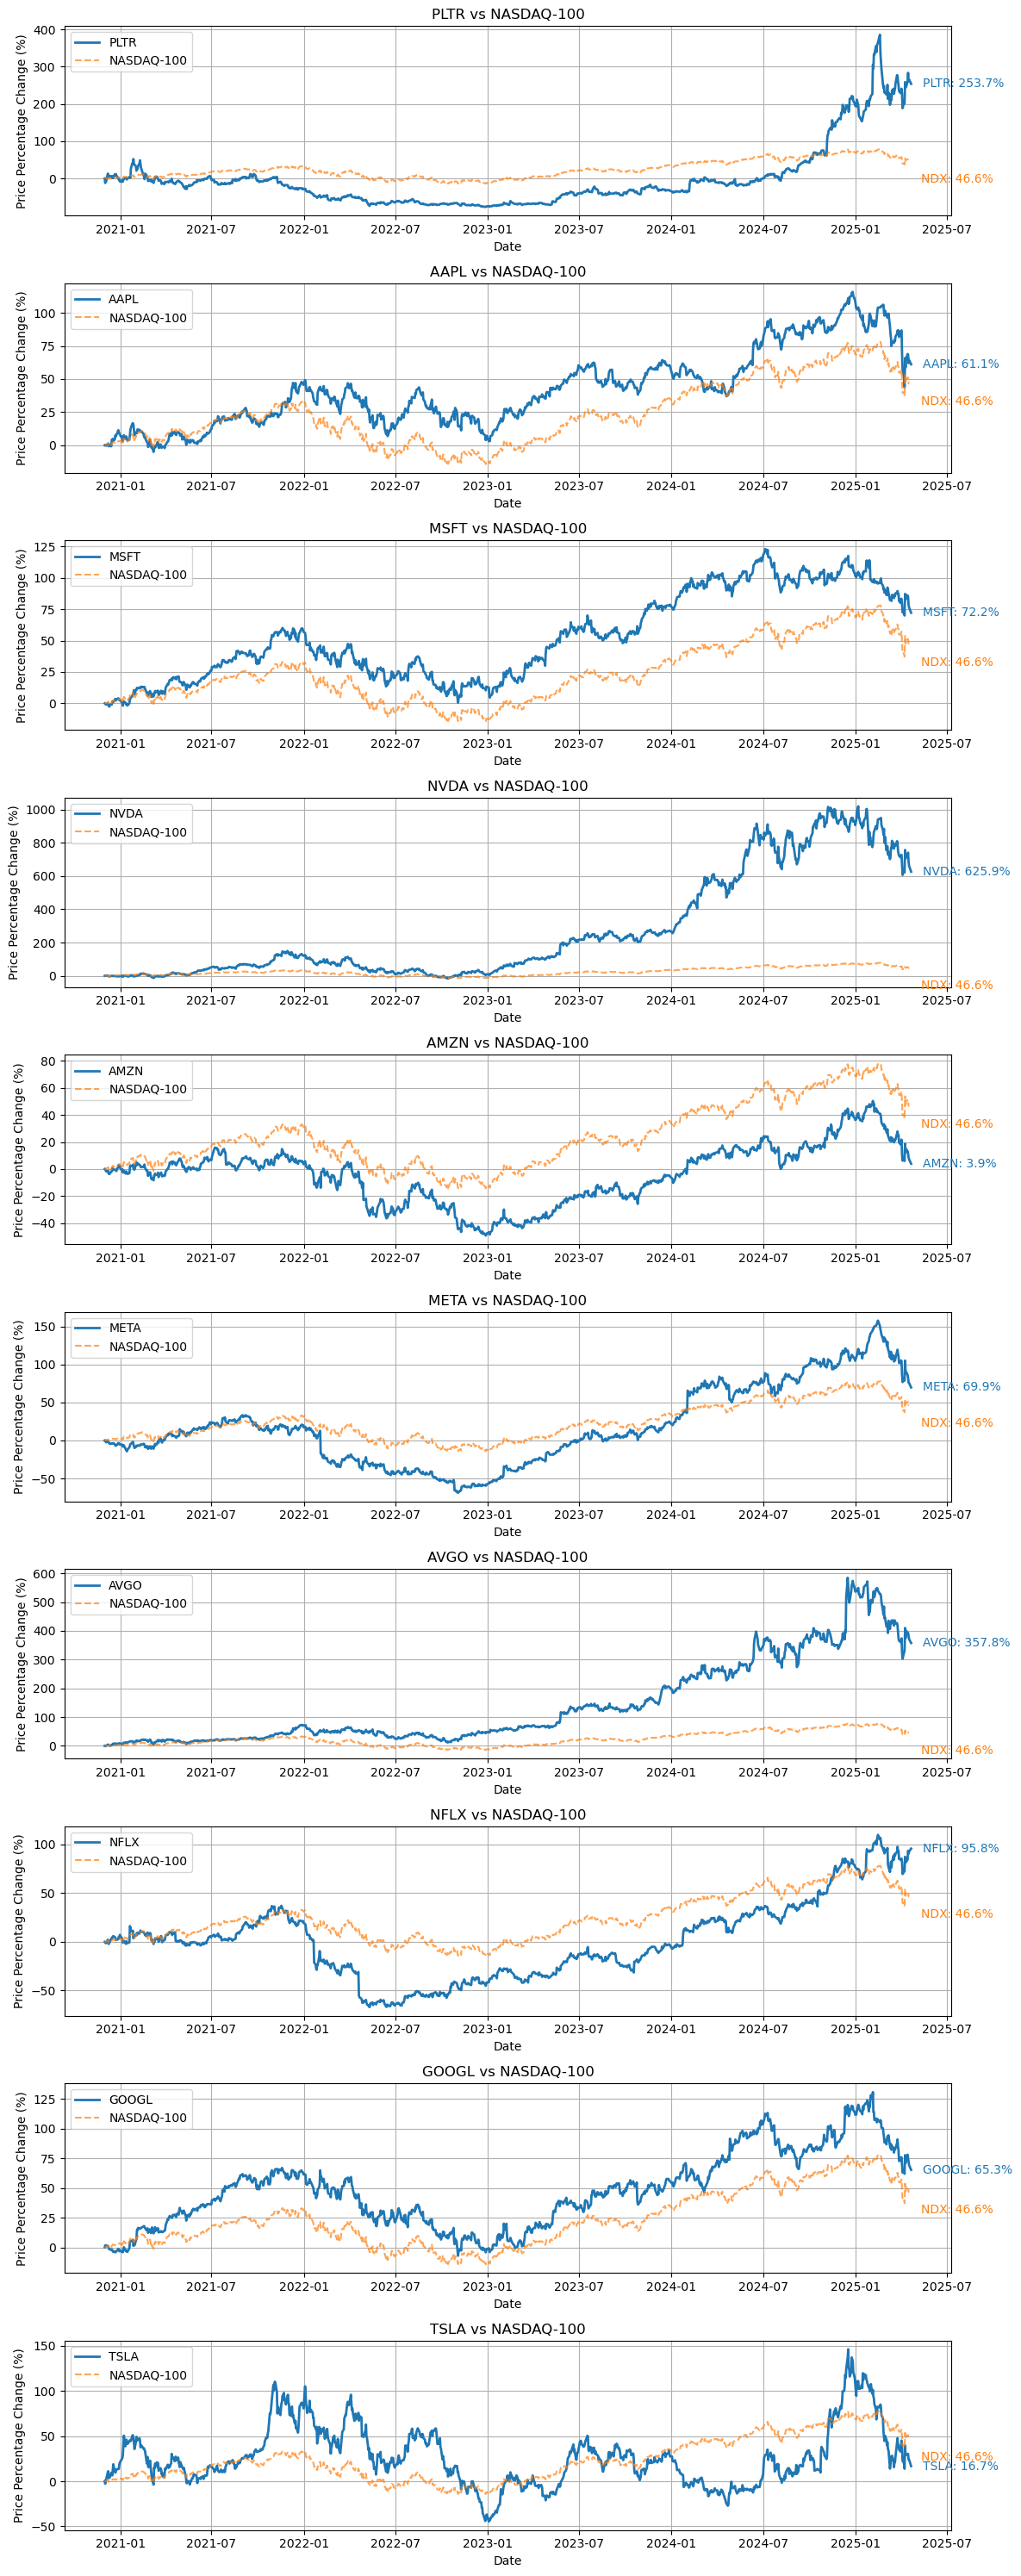

In [133]:
data = {}
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data[symbol] = ticker.history(start='2020-12-1')

# Create subplots
fig, axes = plt.subplots(len(stocks), 1, figsize=(12, 3*len(stocks)))

# Calculate normalized NDX prices (percentage change)
ndx_normalized = (ndx_data['Close'] / ndx_data['Close'].iloc[0] - 1) * 100

# Plot each stock
for idx, (symbol, stock_data) in enumerate(data.items()):
    # Calculate normalized stock prices (percentage change)
    stock_normalized = (stock_data['Close'] / stock_data['Close'].iloc[0] - 1) * 100
    
    # Plot both lines
    stock_line, = axes[idx].plot(stock_data.index, stock_normalized, label=symbol, linewidth=2)
    ndx_line, = axes[idx].plot(ndx_data.index, ndx_normalized, label='NASDAQ-100', 
                              linewidth=1.5, linestyle='--', alpha=0.7)
    
    # Get the last values
    last_stock_value = stock_normalized.iloc[-1]
    last_ndx_value = ndx_normalized.iloc[-1]
    
    # Add annotations for both lines
    axes[idx].annotate(f'{symbol}: {last_stock_value:.1f}%',
                      xy=(stock_data.index[-1], last_stock_value),
                      xytext=(10, 0),
                      textcoords='offset points',
                      ha='left',
                      va='center',
                      color=stock_line.get_color())
    
    axes[idx].annotate(f'NDX: {last_ndx_value:.1f}%',
                      xy=(ndx_data.index[-1], last_ndx_value),
                      xytext=(10, -15),
                      textcoords='offset points',
                      ha='left',
                      va='center',
                      color=ndx_line.get_color())
    
    axes[idx].set_title(f'{symbol} vs NASDAQ-100')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Price Percentage Change (%)')
    axes[idx].grid(True)
    axes[idx].legend(loc='upper left')

# Adjust layout to prevent overlap
plt.tight_layout()

#Save the figure
plt.savefig('price_change.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)

plt.show()

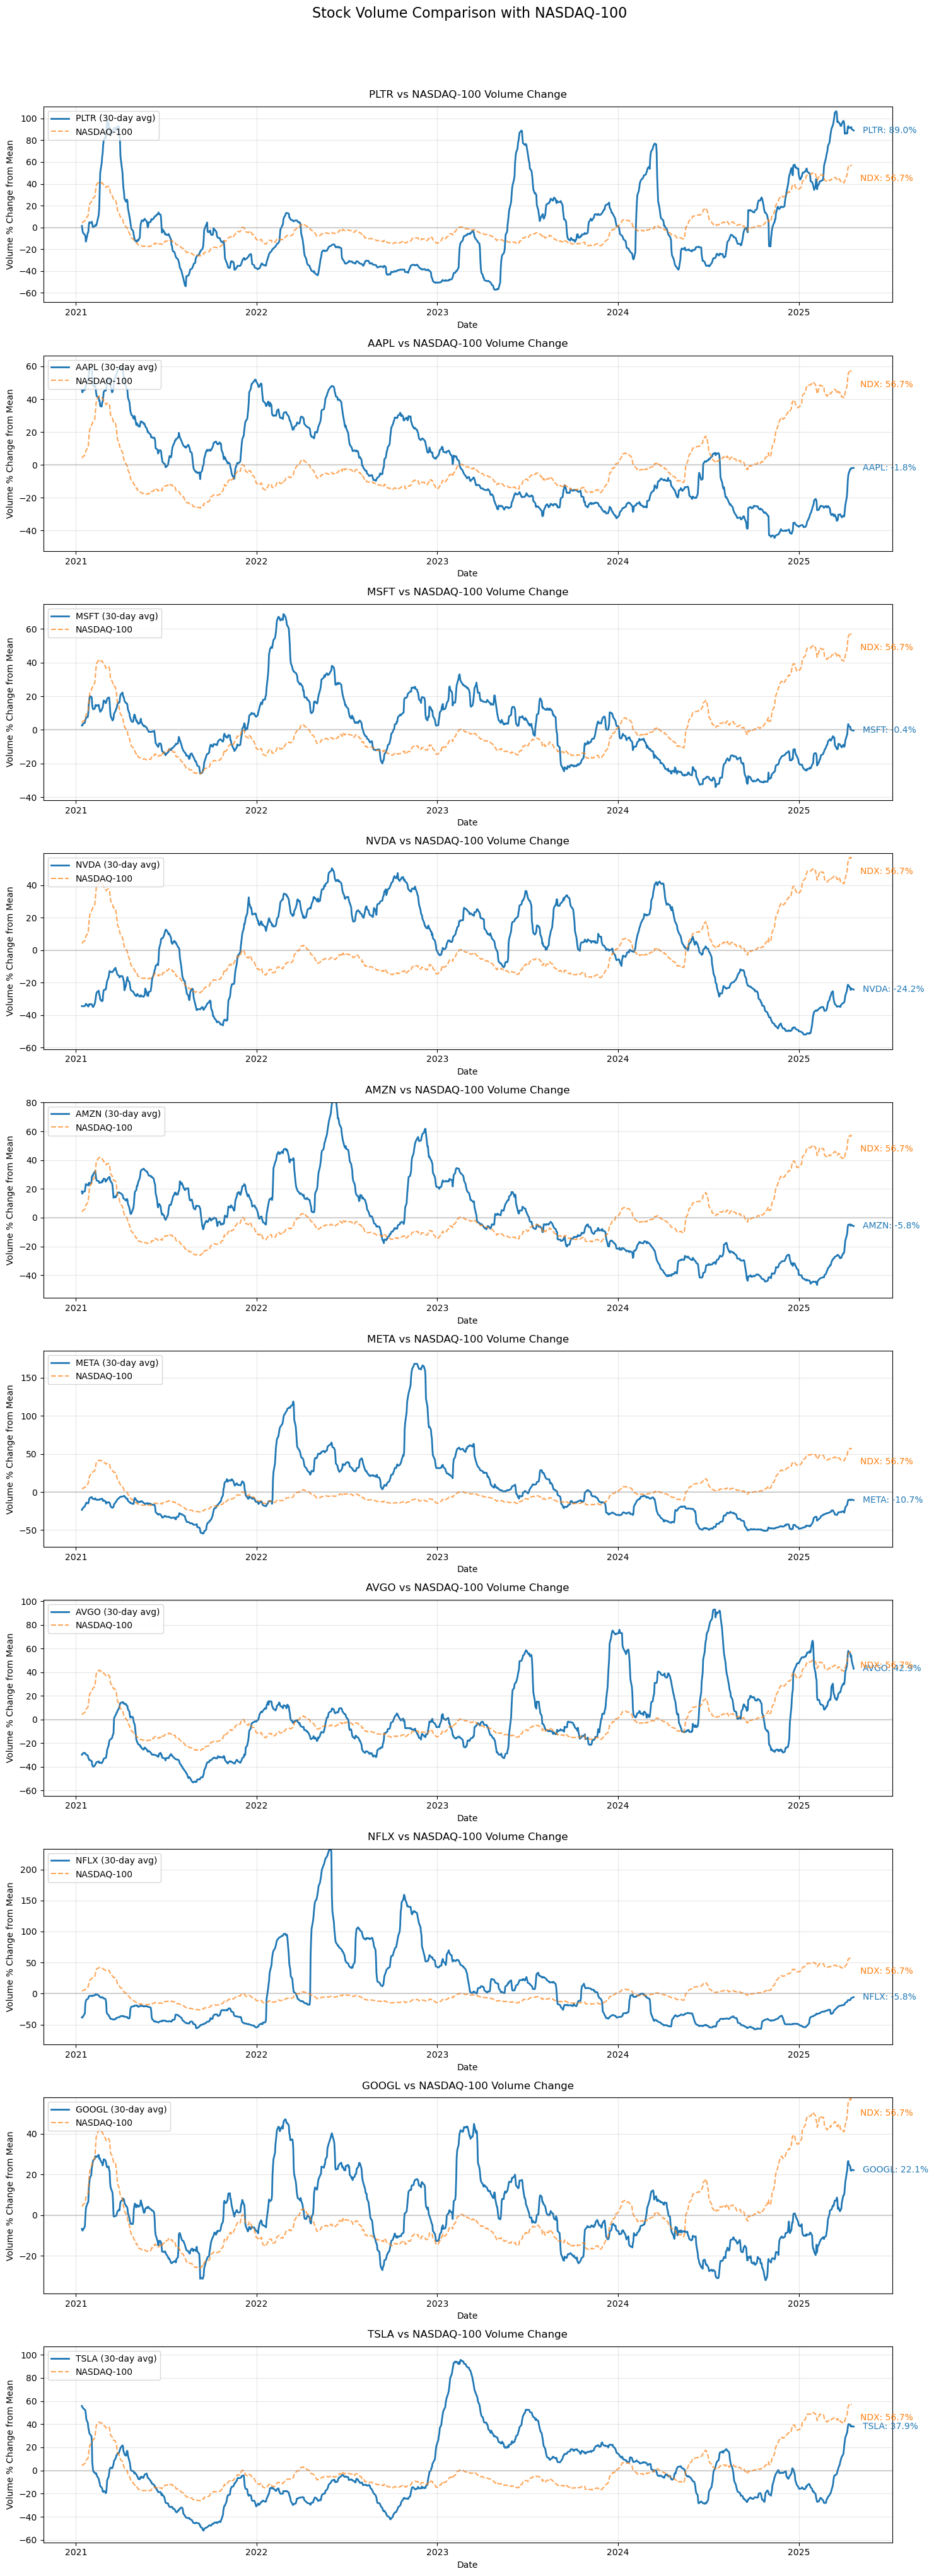

In [113]:
# Download data for each stock
data = {}
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data[symbol] = ticker.history(start='2020-12-1')

# Create subplots
fig, axes = plt.subplots(len(stocks), 1, figsize=(15, 4*len(stocks)))
fig.suptitle('Stock Volume Comparison with NASDAQ-100', fontsize=16, y=1.02)

# Calculate normalized NDX volume (percentage change)
ndx_normalized = (ndx_data['Volume'] / ndx_data['Volume'].mean() - 1) * 100

# Plot each stock
for idx, (symbol, stock_data) in enumerate(data.items()):
    # Calculate normalized stock volume (percentage change from mean)
    stock_normalized = (stock_data['Volume'] / stock_data['Volume'].mean() - 1) * 100

# Calculate rolling mean for smoother visualization (30-day window)
    stock_smooth = stock_normalized.rolling(window=30).mean()
    ndx_smooth = ndx_normalized.rolling(window=30).mean()
    
    # Plot smoothed lines
    stock_line, = axes[idx].plot(stock_data.index, stock_smooth, 
                                label=f'{symbol} (30-day avg)', linewidth=2)
    ndx_line, = axes[idx].plot(ndx_data.index, ndx_smooth, 
                              label='NASDAQ-100', 
                              linewidth=1.5, linestyle='--', alpha=0.7)
    
    # Set y-axis limits to focus on main variation
    y_min = min(stock_smooth.quantile(0.01), ndx_smooth.quantile(0.01))
    y_max = max(stock_smooth.quantile(0.99), ndx_smooth.quantile(0.99))
    margin = (y_max - y_min) * 0.1  # Add 10% margin
    axes[idx].set_ylim(y_min - margin, y_max + margin)
    
    # Get the last values from the smoothed data
    last_stock_value = stock_smooth.iloc[-1]
    last_ndx_value = ndx_smooth.iloc[-1]
    
    # Add annotations for both lines
    axes[idx].annotate(f'{symbol}: {last_stock_value:.1f}%',
                      xy=(stock_data.index[-1], last_stock_value),
                      xytext=(10, 0),
                      textcoords='offset points',
                      ha='left',
                      va='center',
                      color=stock_line.get_color())
    
    axes[idx].annotate(f'NDX: {last_ndx_value:.1f}%',
                      xy=(ndx_data.index[-1], last_ndx_value),
                      xytext=(10, -15),
                      textcoords='offset points',
                      ha='left',
                      va='center',
                      color=ndx_line.get_color())
    
    # Formatting
    axes[idx].set_title(f'{symbol} vs NASDAQ-100 Volume Change', pad=10)
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Volume % Change from Mean')
    axes[idx].grid(True, alpha=0.3)
    axes[idx].legend(loc='upper left')
    
    # Add horizontal line at 0%
    axes[idx].axhline(y=0, color='gray', linestyle='-', alpha=0.3)
    
    # Format dates on x-axis
    axes[idx].xaxis.set_major_locator(YearLocator())
    axes[idx].xaxis.set_major_formatter(DateFormatter('%Y'))

# Adjust layout
plt.tight_layout()

#Save the figure
plt.savefig('volume_change.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)

plt.show()

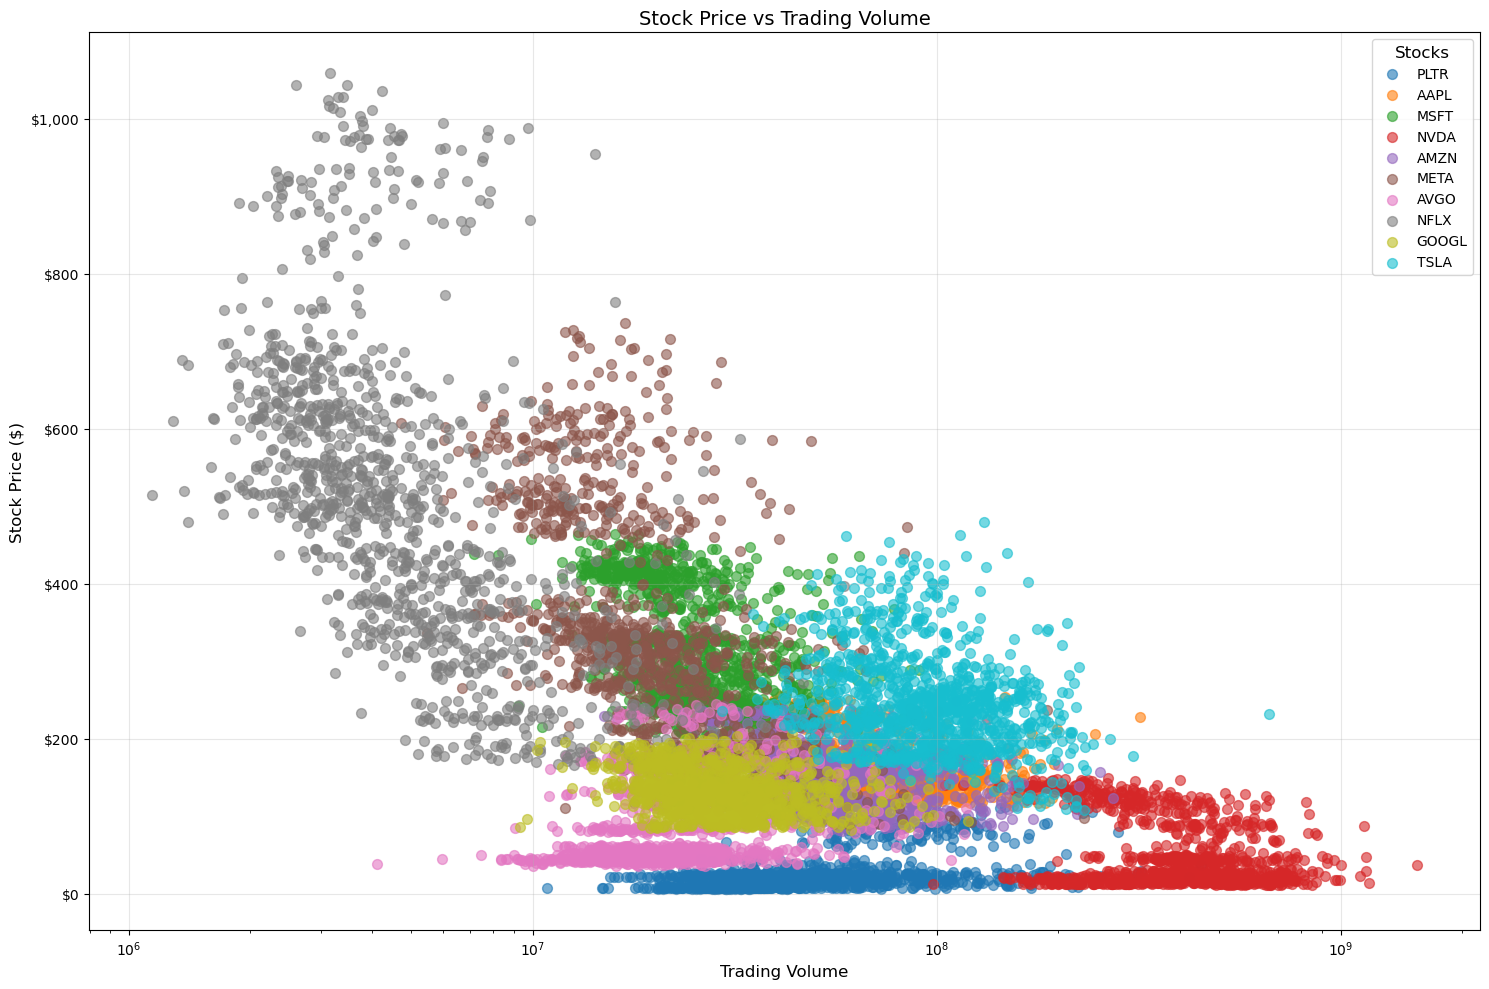


Summary Statistics:

PLTR:
Average Price: $24.87
Average Volume: 58,116,764

AAPL:
Average Price: $170.16
Average Volume: 73,446,995

MSFT:
Average Price: $318.26
Average Volume: 26,243,059

NVDA:
Average Price: $50.16
Average Volume: 424,763,184

AMZN:
Average Price: $154.14
Average Volume: 60,076,963

META:
Average Price: $336.77
Average Volume: 22,802,566

AVGO:
Average Price: $88.33
Average Volume: 25,304,417

NFLX:
Average Price: $508.91
Average Volume: 6,047,113

GOOGL:
Average Price: $132.12
Average Volume: 31,405,974

TSLA:
Average Price: $247.25
Average Volume: 101,901,076


In [115]:
# Download data
data = {}
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data[symbol] = ticker.history(start='2020-12-1')

# Create the scatter plot
fig, ax = plt.subplots(figsize=(15, 10))

# Create scatter plot with different colors for each stock
for symbol in stocks:
    # Get volume and price data
    volume = data[symbol]['Volume']
    price = data[symbol]['Close']
    
    # Create scatter plot
    ax.scatter(volume, 
              price,
              alpha=0.6,
              s=50,
              label=symbol)

# Add labels and title
ax.set_xlabel('Trading Volume', fontsize=12)
ax.set_ylabel('Stock Price ($)', fontsize=12)
ax.set_title('Stock Price vs Trading Volume', fontsize=14)

# Set log scale for volume axis due to large range
ax.set_xscale('log')

# Add legend
ax.legend(title="Stocks", 
         loc='upper right',
         fontsize=10,
         title_fontsize=12)

# Format y-axis to show prices
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Add grid for better readability
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()


#Save the figure
plt.savefig('stock_price_vs_volume.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)


plt.show()

# Print some summary statistics
print("\nSummary Statistics:")
for symbol in stocks:
    avg_price = data[symbol]['Close'].mean()
    avg_volume = data[symbol]['Volume'].mean()
    print(f"\n{symbol}:")
    print(f"Average Price: ${avg_price:,.2f}")
    print(f"Average Volume: {avg_volume:,.0f}")

C:\Users\ejbor\anaconda3\Lib\site-packages\mplcursors\_pick_info.py:56: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  paths = scatter.__wrapped__(*args, **kwargs)


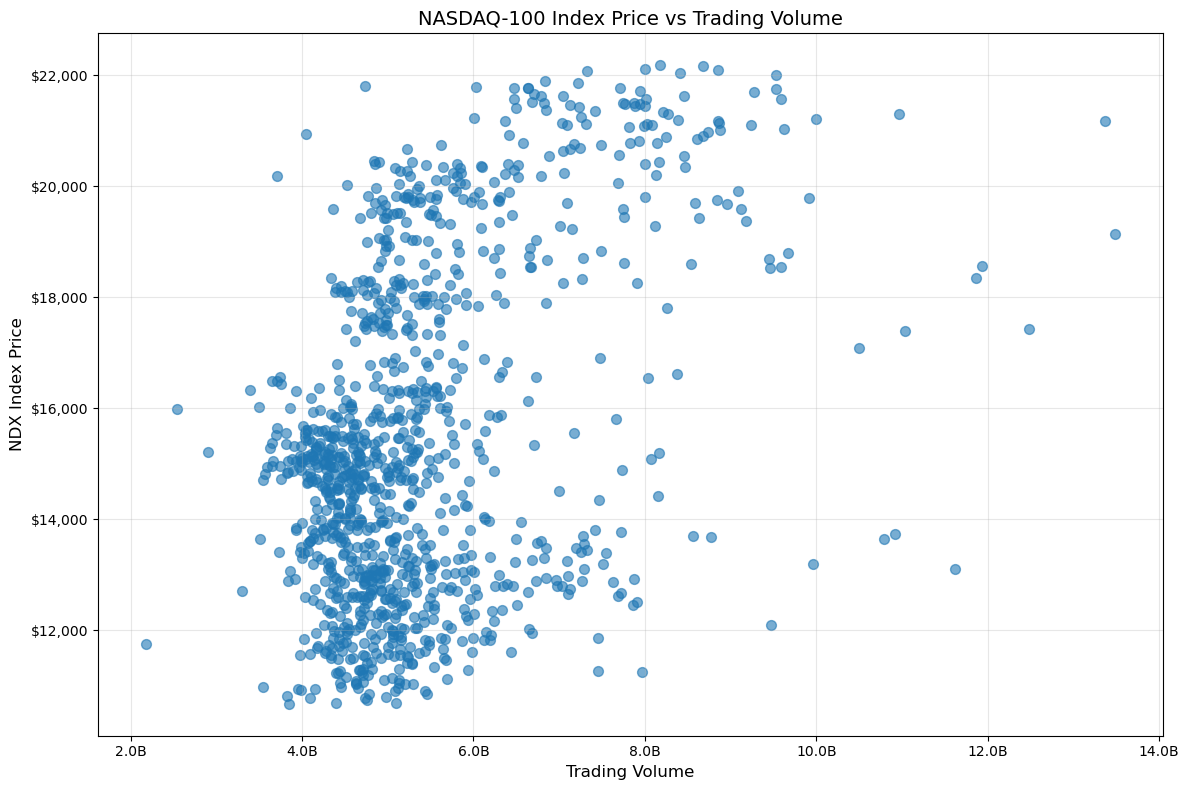


NASDAQ-100 Index Summary Statistics:
Average Price: $15,438.75
Average Volume: 5,417,325,691
Price Range: $10,679.34 - $22,175.60
Volume Range: 2,184,080,000 - 13,479,740,000


In [230]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# Create scatter plot
scatter = ax.scatter(ndx_data['Volume'], 
                    ndx_data['Close'],
                    alpha=0.6,
                    s=50,
                    cmap='viridis')

# Add labels and title
ax.set_xlabel('Trading Volume', fontsize=12)
ax.set_ylabel('NDX Index Price', fontsize=12)
ax.set_title('NASDAQ-100 Index Price vs Trading Volume', fontsize=14)

# Format y-axis to show prices
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Format x-axis to show volume in billions
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x/1e9:.1f}B'))

# Add grid
ax.grid(True, alpha=0.3)

# Adjust layout
plt.tight_layout()

'''
# Save the figure
plt.savefig('ndx_price_vs_volume.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)
'''

plt.show()

# Print summary statistics
print("\nNASDAQ-100 Index Summary Statistics:")
print(f"Average Price: ${ndx_data['Close'].mean():,.2f}")
print(f"Average Volume: {ndx_data['Volume'].mean():,.0f}")
print(f"Price Range: ${ndx_data['Close'].min():,.2f} - ${ndx_data['Close'].max():,.2f}")
print(f"Volume Range: {ndx_data['Volume'].min():,.0f} - {ndx_data['Volume'].max():,.0f}")

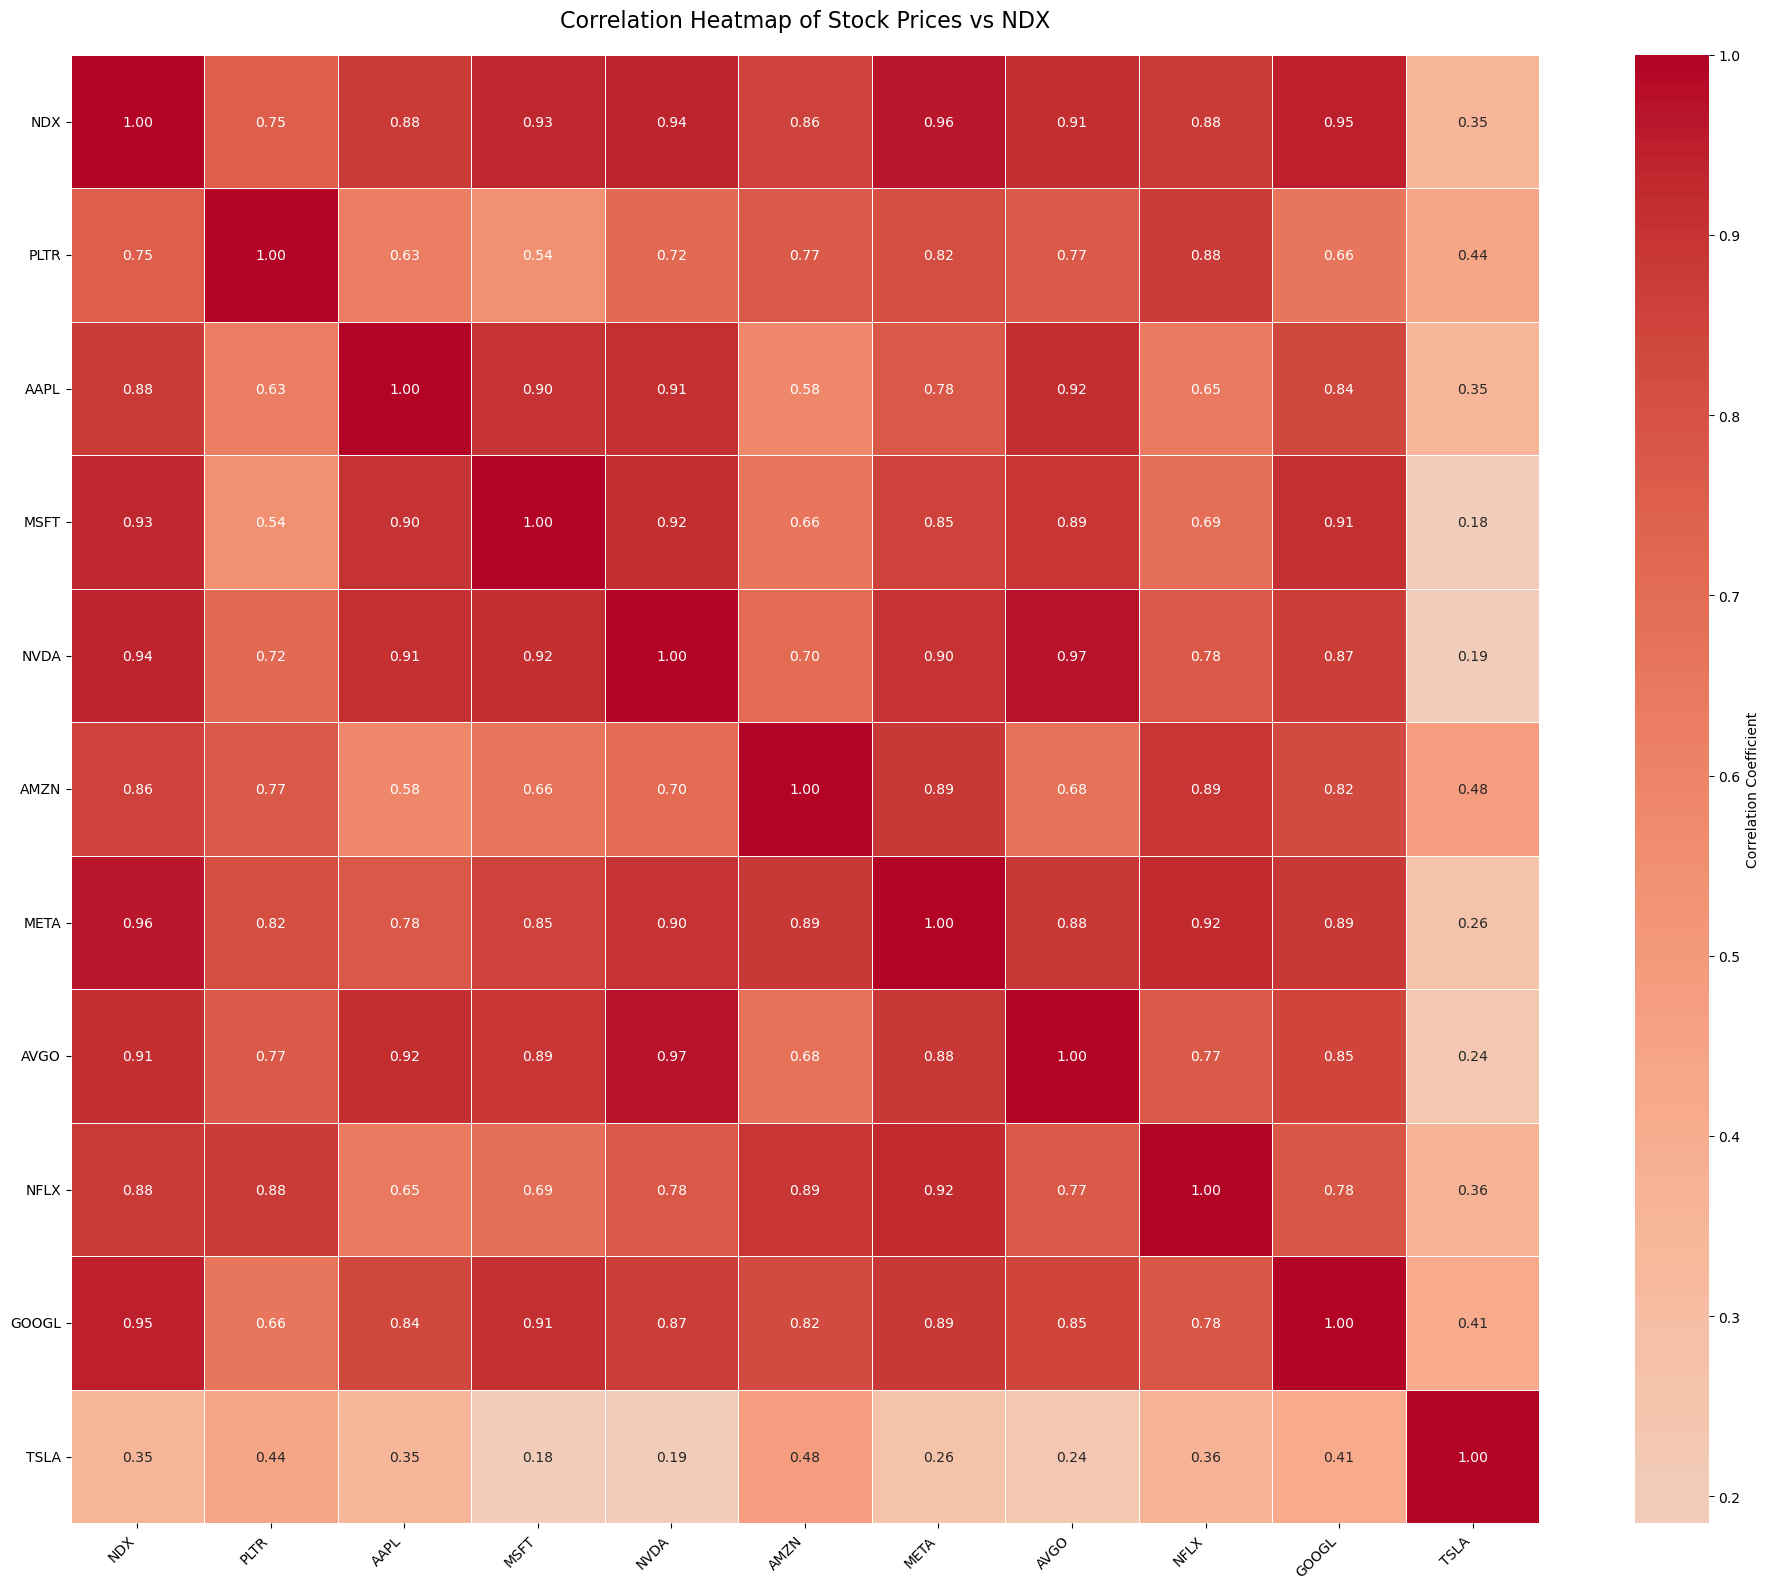


Highest Price Correlations with NDX:
NDX      1.000000
META     0.963615
GOOGL    0.948494
NVDA     0.936465
MSFT     0.934715
Name: NDX, dtype: float64

Lowest Price Correlations with NDX:
TSLA    0.349267
PLTR    0.748714
AMZN    0.855580
NFLX    0.877488
AAPL    0.880254
Name: NDX, dtype: float64


In [117]:
# Create empty DataFrames for closing prices and volumes
closes = pd.DataFrame()

# Download NDX data
closes['NDX'] = ndx_data['Close']

# Download data for each stock
for symbol in stocks:
    ticker = yf.Ticker(symbol)
    data = ticker.history(start='2020-12-1')
    closes[symbol] = data['Close']

# Combine closes and volumes
all_data = pd.concat([closes], axis=1)

# Calculate correlation matrix
corr_matrix = all_data.corr()

# Create figure with larger size
plt.figure(figsize=(20, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,  # Show correlation values
            cmap='coolwarm',  # Color scheme
            center=0,  # Center the colormap at 0
            fmt='.2f',  # Show 2 decimal places
            square=True,  # Make cells square
            linewidths=0.5,  # Add lines between cells
            cbar_kws={'label': 'Correlation Coefficient'})

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Add title
plt.title('Correlation Heatmap of Stock Prices vs NDX', pad=20, fontsize=16)

# Adjust layout to prevent label cutoff
plt.tight_layout()


# Save the figure
plt.savefig('stock_correlation_heatmap.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)


plt.show()

# Print some interesting correlations
print("\nHighest Price Correlations with NDX:")
ndx_price_corr = corr_matrix['NDX'].sort_values(ascending=False)
print(ndx_price_corr.head())

print("\nLowest Price Correlations with NDX:")
ndx_price_corr = corr_matrix['NDX'].sort_values(ascending=True)
print(ndx_price_corr.head())


First few rows of daily returns:
                PLTR      AAPL      MSFT      NVDA      AMZN      META  \
Date                                                                     
2020-12-01       NaN       NaN       NaN       NaN       NaN       NaN   
2020-12-02 -0.123101  0.002933 -0.003885  0.011538 -0.005140  0.003385   
2020-12-03  0.067526 -0.001138 -0.005247 -0.010672 -0.005244 -0.019720   
2020-12-04 -0.007491 -0.005613  0.000560  0.012112 -0.007578 -0.007628   
2020-12-07  0.213417  0.012270 -0.000327  0.003577 -0.001448  0.021023   

                AVGO      NFLX     GOOGL      TSLA  
Date                                                
2020-12-01       NaN       NaN       NaN       NaN  
2020-12-02 -0.002076 -0.002378  0.016492 -0.027259  
2020-12-03 -0.009734 -0.011641 -0.001715  0.043177  
2020-12-04  0.029715  0.001588  0.001054  0.009539  
2020-12-07  0.022372  0.035059 -0.003690  0.071314  


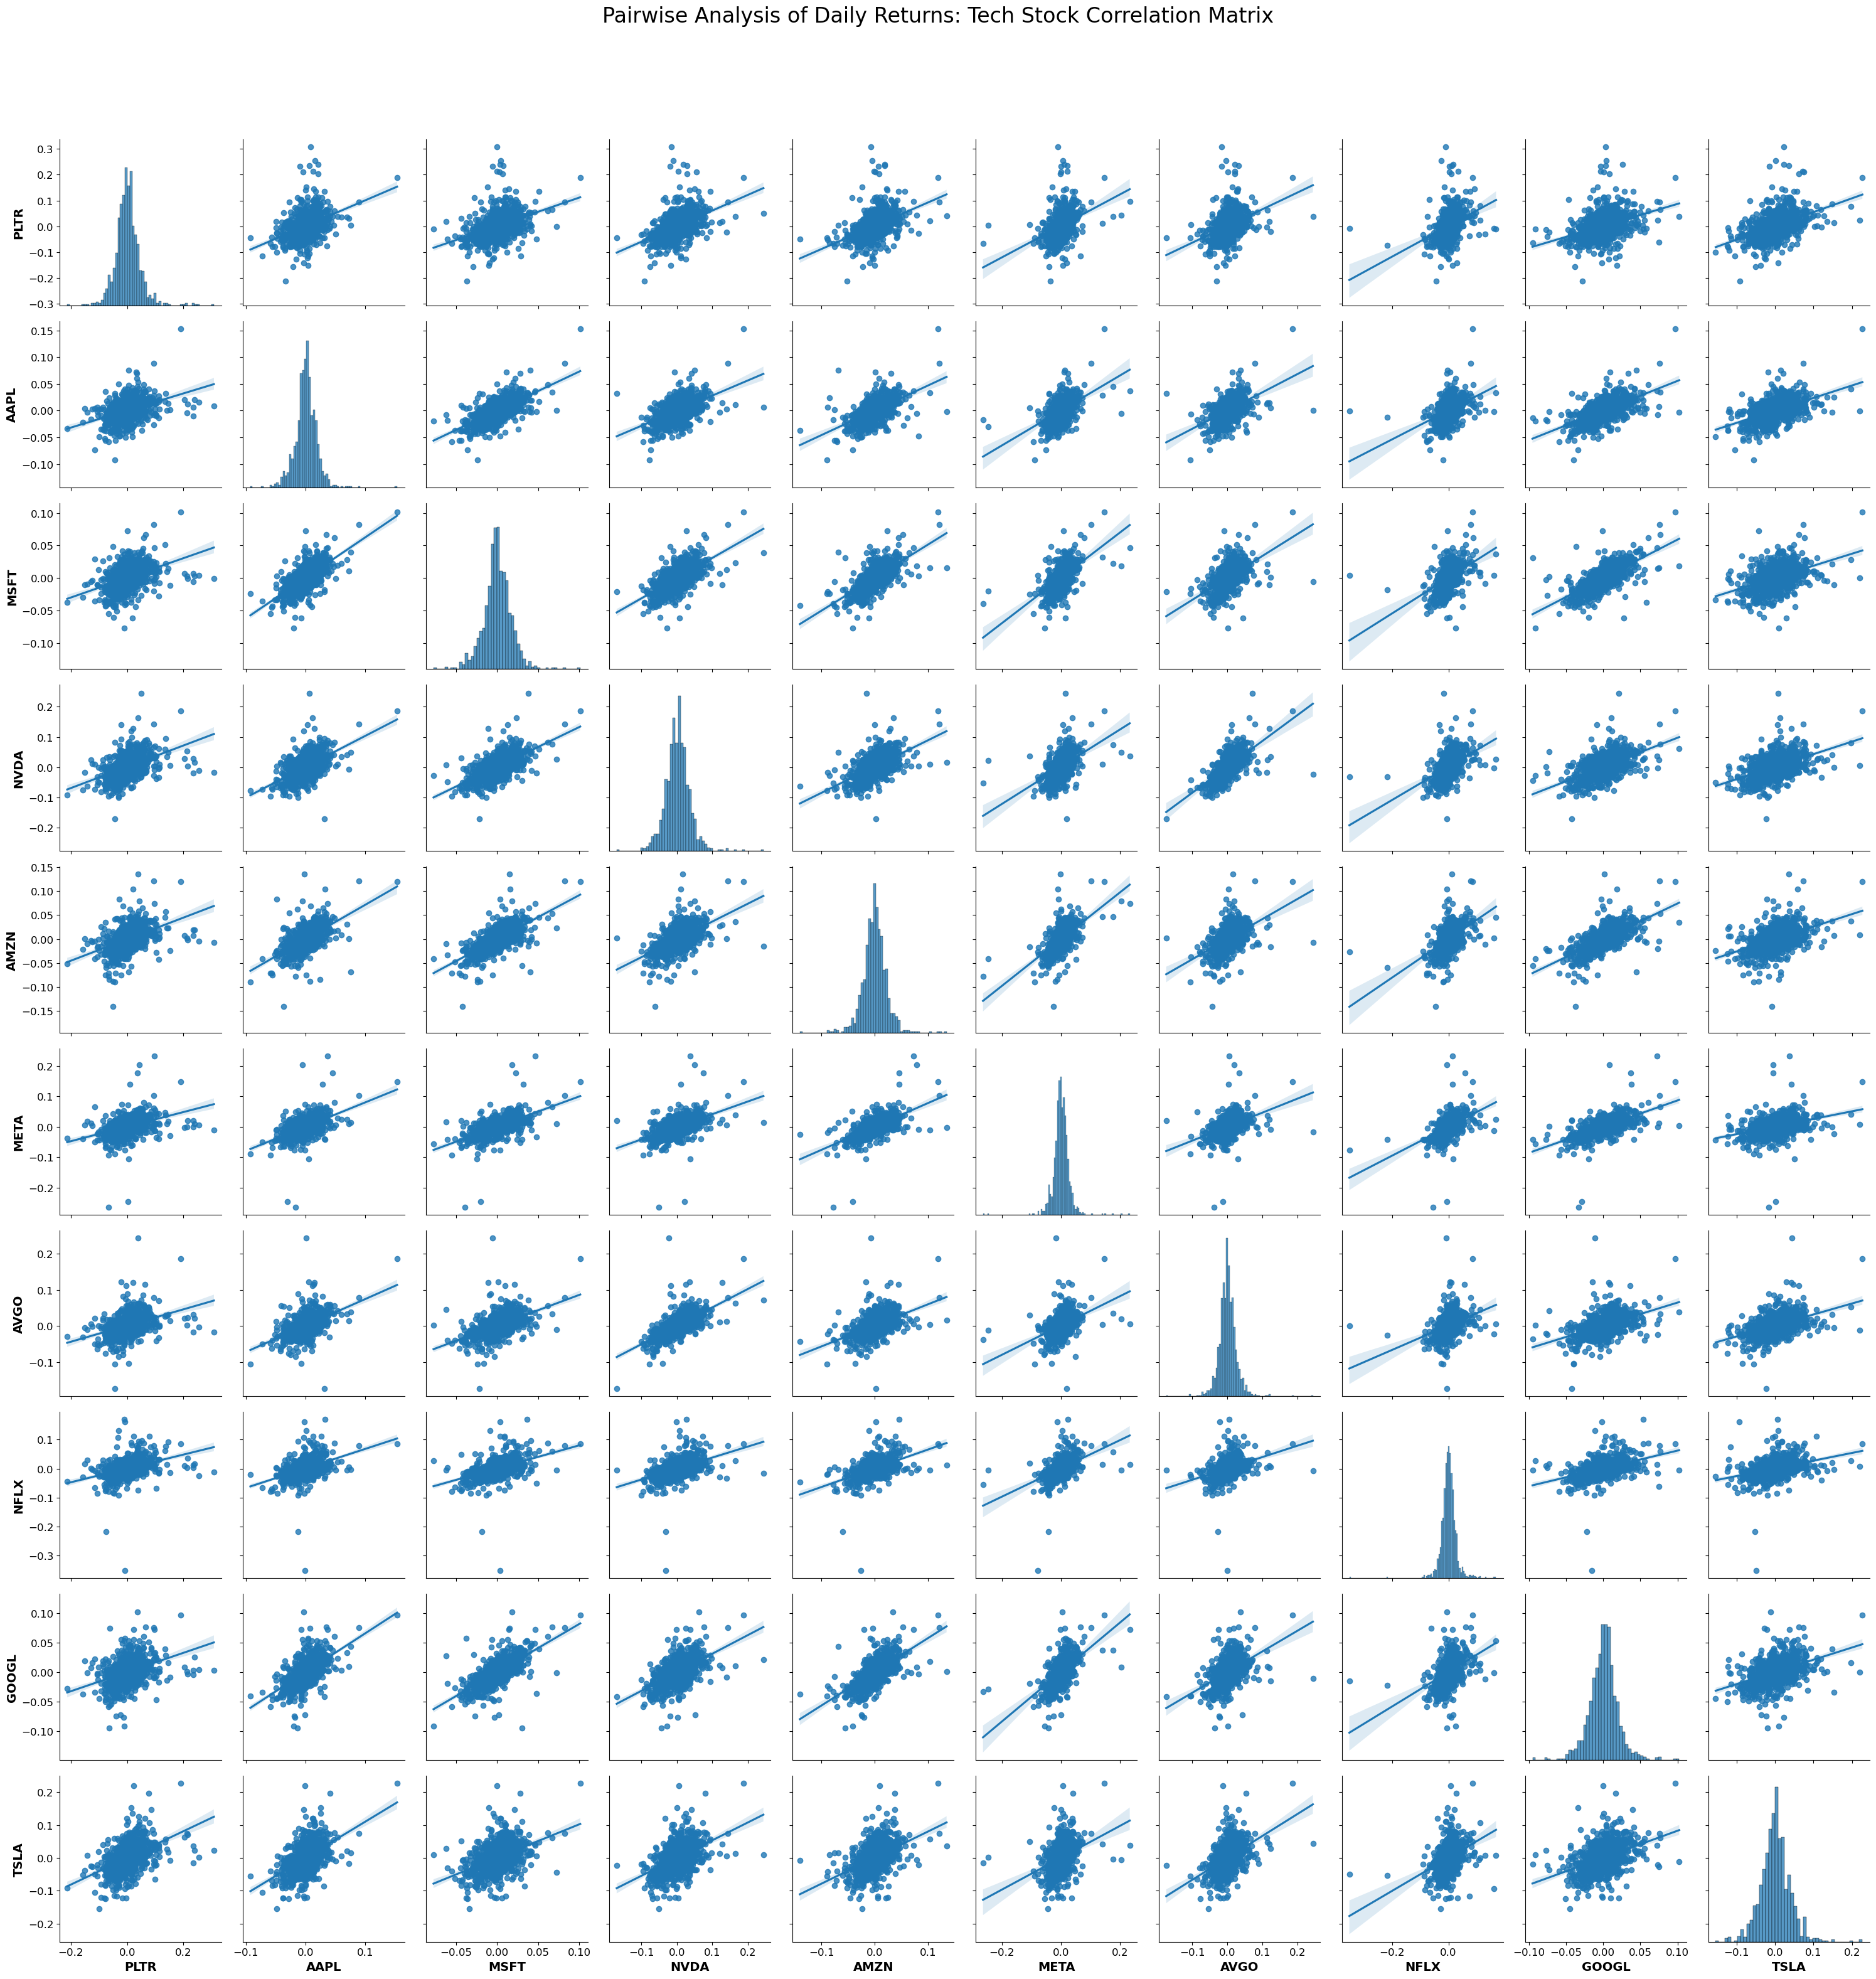

In [137]:
closing_df = pd.DataFrame()

# Add individual stock closing prices
for symbol in stocks:
    closing_df[symbol] = ndx_stocks[symbol]['Close']

# Calculate daily returns
tech_rets = closing_df.pct_change()

# Display first few rows of returns
print("\nFirst few rows of daily returns:")
print(tech_rets.head())

# Create correlation matrix of returns
corr_matrix = tech_rets.corr()
pairplot = sns.pairplot(tech_rets, kind='reg');
pairplot.fig.set_size_inches(30, 30)  
pairplot.fig.suptitle('Pairwise Analysis of Daily Returns: Tech Stock Correlation Matrix', size=24, y=1.05)
for ax in pairplot.axes.flat:
    if ax is not None:
        ax.set_xlabel(ax.get_xlabel(), fontsize=14, fontweight='bold')  # Larger x labels
        ax.set_ylabel(ax.get_ylabel(), fontsize=14, fontweight='bold')  # Larger y labels
        ax.tick_params(labelsize=12)  # Larger tick labels
plt.tight_layout()

plt.savefig('tech_stocks_pairplot.png', 
            dpi=300, 
            bbox_inches='tight',
            pad_inches=0.5)

plt.show()

In [96]:
correlations = []
for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        correlations.append({
            'Stock 1': corr_matrix.columns[i],
            'Stock 2': corr_matrix.columns[j],
            'Correlation': corr_matrix.iloc[i,j]
        })

corr_df = pd.DataFrame(correlations)
print("\nTop 5 Most Correlated Pairs:")
print(corr_df.nlargest(5, 'Correlation'))

print("\nTop 5 Least Correlated Pairs:")
print(corr_df.nsmallest(5, 'Correlation'))


Top 5 Most Correlated Pairs:
   Stock 1 Stock 2  Correlation
22    MSFT   GOOGL     0.694288
18    MSFT    AMZN     0.682075
9     AAPL    MSFT     0.673739
26    NVDA    AVGO     0.660678
33    AMZN   GOOGL     0.653194

Top 5 Least Correlated Pairs:
   Stock 1 Stock 2  Correlation
38    META    TSLA     0.348691
39    AVGO    NFLX     0.364179
43    NFLX    TSLA     0.365764
7     PLTR   GOOGL     0.373507
6     PLTR    NFLX     0.377181


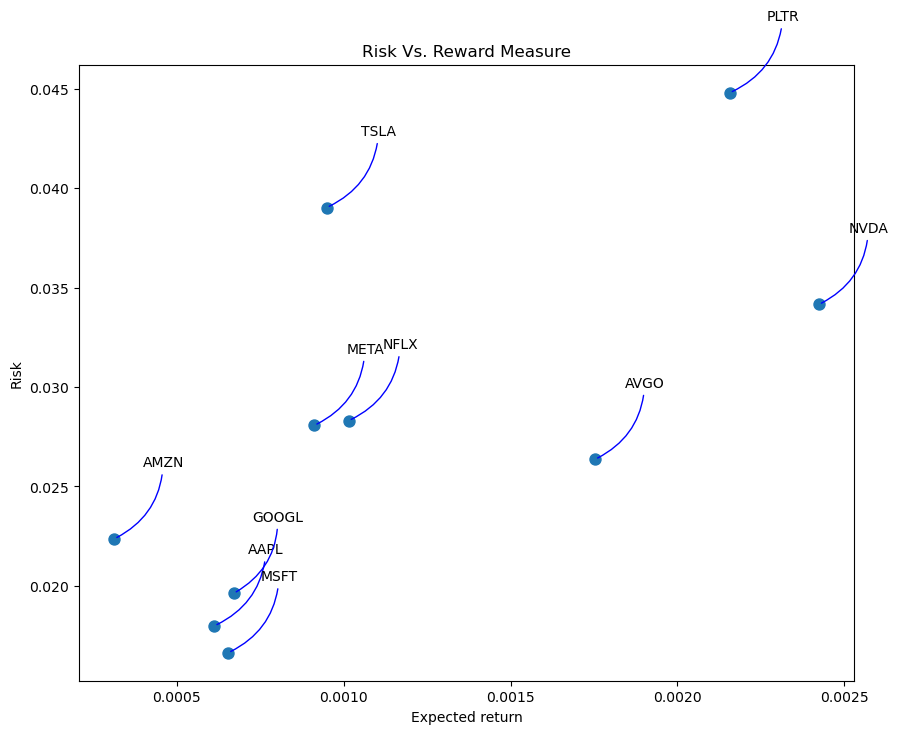

In [209]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.title('Risk Vs. Reward Measure')
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

#Save the figure
plt.savefig('stock_risk.png', 
            dpi=300,
            bbox_inches='tight',
            pad_inches=0.5)

# Modeling

### Decision Tree Classifier

In [85]:
X = ndx_data.drop(columns=["Target", "Tomorrow"])
y = ndx_data["Target"]
model = DTC(max_depth=5, min_samples_split=100, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=42)

In [87]:
y_pred = model.predict(X_test)
y_pred = pd.Series(y_pred, index=X_test.index)
y_pred = y_pred.sort_index()

In [89]:
y_pred

Date
2020-12-03 00:00:00-05:00    1
2020-12-04 00:00:00-05:00    1
2020-12-09 00:00:00-05:00    1
2020-12-15 00:00:00-05:00    1
2020-12-17 00:00:00-05:00    1
                            ..
2025-03-20 00:00:00-04:00    1
2025-03-26 00:00:00-04:00    1
2025-04-08 00:00:00-04:00    1
2025-04-14 00:00:00-04:00    1
2025-04-16 00:00:00-04:00    1
Length: 331, dtype: int32

In [91]:
print("Nasdaq-100 price movement prediction accuracy score:", accuracy_score(y_test, y_pred))
print("Nasdaq-100 price movement prediction precision score:", precision_score(y_test, y_pred))

Nasdaq-100 price movement prediction accuracy score: 0.525679758308157
Nasdaq-100 price movement prediction precision score: 0.5309446254071661


In [63]:
combined = pd.concat([y_test, y_pred], axis=1)

<Axes: xlabel='Date'>

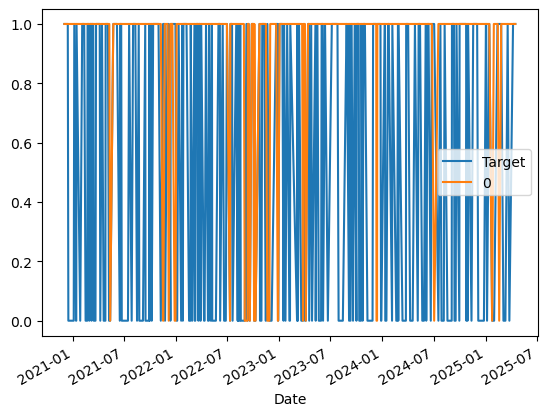

In [65]:
combined.plot()

In [75]:
results_dt = []

for ticker in stocks:
    print(f"\n📊 Evaluating {ticker}...")

    # Download data
    df = yf.Ticker(ticker)
    df = df.history(start='2020-12-1')
    df = df.drop(columns=[col for col in ['Dividends', 'Stock Splits'] if col in df.columns])

   
    df["Tomorrow"] = df["Close"].shift(-1)
    df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
    df = df.dropna()

    X = df[["Open", "High", "Low", "Close", "Volume"]]
    y = df["Target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=False
    )

     # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    model = DTC(max_depth=5, min_samples_split=100, random_state=42)
    model.fit(X_train_scaled, y_train)
    y_pred = pd.Series(model.predict(X_test_scaled), index=X_test.index)

    # Standard metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    error_rate = 1 - accuracy

    # Normalized accuracy from confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall_pos = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_neg = tn / (tn + fp) if (tn + fp) > 0 else 0
    normalized_accuracy = (recall_pos + recall_neg) / 2

    results_dt.append({
        "Stock": ticker,
        "Accuracy": round(accuracy, 4),
        "Normalized Accuracy": round(normalized_accuracy, 4),
        "Error Rate": round(error_rate, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
    })

# Convert to DataFrame and show table
results_df_dt = pd.DataFrame(results_dt)
print("\n📋 Decision Tree Classifier Metrics by Stock:\n")
print(results_df_dt.to_string(index=False))


📊 Evaluating PLTR...

📊 Evaluating AAPL...

📊 Evaluating MSFT...

📊 Evaluating NVDA...

📊 Evaluating AMZN...

📊 Evaluating META...

📊 Evaluating AVGO...

📊 Evaluating NFLX...

📊 Evaluating GOOGL...

📊 Evaluating TSLA...

📋 Decision Tree Classifier Metrics by Stock:

Stock  Accuracy  Normalized Accuracy  Error Rate  Precision  Recall  F1-Score
 PLTR    0.4834               0.5050      0.5166     0.6250  0.0289    0.0552
 AAPL    0.4562               0.4701      0.5438     0.5000  0.3111    0.3836
 MSFT    0.5136               0.4978      0.4864     0.5184  0.9012    0.6582
 NVDA    0.4653               0.5078      0.5347     0.8000  0.0222    0.0432
 AMZN    0.5287               0.5362      0.4713     0.6327  0.1834    0.2844
 META    0.4804               0.5091      0.5196     0.6250  0.0568    0.1042
 AVGO    0.5106               0.5000      0.4894     0.5106  1.0000    0.6760
 NFLX    0.4773               0.4774      0.5227     0.5030  0.4770    0.4897
GOOGL    0.4713               

## XGBoost

In [77]:
results_xgb = []

for ticker in stocks:
    print(f"\n🚀 Evaluating {ticker} with XGBoost...")

    # Download data
    df = yf.Ticker(ticker)
    df = df.history(start='2020-12-1')
    df = df.drop(columns=[col for col in ['Dividends', 'Stock Splits'] if col in df.columns])

   
    df["Tomorrow"] = df["Close"].shift(-1)
    df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
    df = df.dropna()

    X = df[["Open", "High", "Low", "Close", "Volume"]]
    y = df["Target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, shuffle=False
        )
    
    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    pos = sum(y_train == 1)
    neg = sum(y_train == 0)
    scale_pos_weight = neg / pos if pos > 0 else 1

    # Train XGBoost classifier
    model = XGBClassifier(eval_metric='logloss', scale_pos_weight=scale_pos_weight, random_state=42)
    model.fit(X_train_scaled, y_train)

    y_pred = model.predict(X_test_scaled)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    error_rate = 1 - accuracy

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    recall_pos = tp / (tp + fn) if (tp + fn) > 0 else 0
    recall_neg = tn / (tn + fp) if (tn + fp) > 0 else 0
    normalized_accuracy = (recall_pos + recall_neg) / 2

    results_xgb.append({
        "Stock": ticker,
        "Accuracy": round(accuracy, 4),
        "Error Rate": round(error_rate, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
        "Normalized Accuracy": round(normalized_accuracy, 4)
    })

# Results Table
results_df_xgb = pd.DataFrame(results_xgb)
print("\n📊 XGBoost Classifier Performance by Stock:\n")
print(results_df_xgb.to_string(index=False))


🚀 Evaluating PLTR with XGBoost...

🚀 Evaluating AAPL with XGBoost...

🚀 Evaluating MSFT with XGBoost...

🚀 Evaluating NVDA with XGBoost...

🚀 Evaluating AMZN with XGBoost...

🚀 Evaluating META with XGBoost...

🚀 Evaluating AVGO with XGBoost...

🚀 Evaluating NFLX with XGBoost...

🚀 Evaluating GOOGL with XGBoost...

🚀 Evaluating TSLA with XGBoost...

📊 XGBoost Classifier Performance by Stock:

Stock  Accuracy  Error Rate  Precision  Recall  F1-Score  Normalized Accuracy
 PLTR    0.5227      0.4773     0.5806  0.3121    0.4060               0.5327
 AAPL    0.4804      0.5196     0.5500  0.2444    0.3385               0.5030
 MSFT    0.4924      0.5076     0.5079  0.7442    0.6038               0.4822
 NVDA    0.4622      0.5378     0.7500  0.0167    0.0326               0.5050
 AMZN    0.5076      0.4924     0.5294  0.3195    0.3985               0.5116
 META    0.4713      0.5287     0.5019  0.7500    0.6014               0.4524
 AVGO    0.4743      0.5257     0.4865  0.5325    0.5085  

In [63]:
# Rename columns for clarity
results_dt = results_df_dt.rename(columns={
    "Accuracy": "DT_Accuracy",
    "Error Rate": "DT_Error",
    "Precision": "DT_Precision",
    "Recall": "DT_Recall",
    "F1-Score": "DT_F1",
    "Normalized Accuracy": "DT_NormAcc"
})

results_xgb = results_df_xgb.rename(columns={
    "Accuracy": "XGB_Accuracy",
    "Error Rate": "XGB_Error",
    "Precision": "XGB_Precision",
    "Recall": "XGB_Recall",
    "F1-Score": "XGB_F1",
    "Normalized Accuracy": "XGB_NormAcc"
})

# Merge results on Stock
comparison_df = pd.merge(results_dt, results_xgb, on="Stock")

# Display
print("\n📊 Side-by-Side Performance Comparison: Decision Tree vs XGBoost\n")
print(comparison_df.to_string(index=False))


📊 Side-by-Side Performance Comparison: Decision Tree vs XGBoost

Stock  DT_Accuracy  DT_NormAcc  DT_Error  DT_Precision  DT_Recall  DT_F1  XGB_Accuracy  XGB_NormAcc  XGB_Error  XGB_Precision  XGB_Recall  XGB_F1
 PLTR       0.4834      0.5050    0.5166        0.6250     0.0289 0.0552        0.5136       0.5221     0.4864         0.5577      0.3353  0.4188
 AAPL       0.4562      0.4701    0.5438        0.5000     0.3111 0.3836        0.4562       0.4803     0.5438         0.5000      0.2056  0.2913
 MSFT       0.5136      0.4978    0.4864        0.5184     0.9012 0.6582        0.4864       0.4771     0.5136         0.5041      0.7151  0.5913
 NVDA       0.4653      0.5078    0.5347        0.8000     0.0222 0.0432        0.4592       0.5022     0.5408         0.6667      0.0111  0.0219
 AMZN       0.5287      0.5362    0.4713        0.6327     0.1834 0.2844        0.5106       0.5151     0.4894         0.5368      0.3018  0.3864
 META       0.4804      0.5091    0.5196        0.6250    

## Artifical Neural Networks (ANN)

In [94]:
results_ann = []

for ticker in stocks:
    print(f"\n🔍 Processing {ticker}...")

    # Download data
    df = yf.Ticker(ticker)
    df = df.history(start='2020-12-1')
    df = df.drop(columns=[col for col in ['Dividends', 'Stock Splits'] if col in df.columns])

   
    df["Tomorrow"] = df["Close"].shift(-1)
    df["Target"] = (df["Tomorrow"] > df["Close"]).astype(int)
    df = df.dropna()

    X = df[["Open", "High", "Low", "Close", "Volume"]]
    y = df["Target"]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, shuffle=False, random_state=42
    )

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Neural network classifier
    model = MLPClassifier(
    hidden_layer_sizes=(128, 64, 32),  # 3-layer network
    max_iter=1000,                     # More training time
    activation='relu',                # Default: good for most cases
    solver='adam',                    # Adam optimizer
    random_state=42
    )
    
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    error_rate = 1 - accuracy

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    norm_acc = ((tp / (tp + fn)) + (tn / (tn + fp))) / 2

    results_ann.append({
        "Stock": ticker,
        "Accuracy": round(accuracy, 4),
        "Normalized Accuracy": round(norm_acc, 4),
        "Error Rate": round(error_rate, 4),
        "Precision": round(precision, 4),
        "Recall": round(recall, 4),
        "F1-Score": round(f1, 4),
    })

# Convert to DataFrame and show table
results_df_ann = pd.DataFrame(results_ann)
print("\n📊 Neural Network Performance by Stock:\n")
print(results_df_ann.to_string(index=False))


🔍 Processing PLTR...

🔍 Processing AAPL...

🔍 Processing MSFT...

🔍 Processing NVDA...

🔍 Processing AMZN...

🔍 Processing META...

🔍 Processing AVGO...

🔍 Processing NFLX...

🔍 Processing GOOGL...

🔍 Processing TSLA...

📊 Neural Network Performance by Stock:

Stock  Accuracy  Normalized Accuracy  Error Rate  Precision  Recall  F1-Score
 PLTR    0.5378               0.5372      0.4622     0.5588  0.5491    0.5539
 AAPL    0.4562               0.4829      0.5438     0.5000  0.1778    0.2623
 MSFT    0.5076               0.5062      0.4924     0.5254  0.5407    0.5330
 NVDA    0.4562               0.4989      0.5438     0.5000  0.0111    0.0217
 AMZN    0.5317               0.5391      0.4683     0.6400  0.1893    0.2922
 META    0.4713               0.5028      0.5287     1.0000  0.0057    0.0113
 AVGO    0.5015               0.5115      0.4985     0.7000  0.0414    0.0782
 NFLX    0.4924               0.5120      0.5076     0.5750  0.1322    0.2150
GOOGL    0.4743               0.5210